## New York City Demographics

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
# suppress warning
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
import geopandas as gpd

In [2]:
puma_demog = pd.read_excel('demo_2018_acs5yr_puma.xlsx')
puma_econ = pd.read_excel('econ_2018_acs5yr_puma.xlsx')
puma_hous = pd.read_excel('hous_2018_acs5yr_puma.xlsx')
puma_soc = pd.read_excel('soc_2018_acs5yr_puma.xlsx')

demo_cols = ['GeogName','GeoID','PopU181P', 'Pop65pl1P', 'MdAgeE', 'WtNHP']
econ_cols = ['GeogName','GeoID','CvLFUEm2P','MdHHIncE']
hous_cols = ['GeogName','GeoID','HU1uDP','ROcHU1P']
soc_cols = ['GeogName','GeoID','HH1plU18P', 'EA_BchDHP', 'Fb1P','LgOEnLEP1P']

puma_demog = puma_demog[demo_cols]
puma_econ = puma_econ[econ_cols]
puma_soc = puma_soc[soc_cols]
puma_hous = puma_hous[hous_cols]

puma_demo = puma_demog.merge(puma_econ, on=['GeogName','GeoID'], how='left')
puma_demo = puma_demo.merge(puma_soc, on=['GeogName','GeoID'], how='left')
puma_demo = puma_demo.merge(puma_hous, on=['GeogName','GeoID'], how='left')
puma_demo.columns = ['name', 'PUMA', "pct_under_18", 'pct_over_65', 'median_age', 'pct_white', 'unemployment_rt', 'median_income', 'pct_w_children', 'bachelors_degree', 'pct_foreign_born', 'pct_poor_english', 'pct_detached_unit', 'pct_renter' ]
puma_demo


,name,PUMA,pct_under_18,pct_over_65,median_age,pct_white,unemployment_rt,median_income,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter
0,NYC-Bronx Community District 1 & 2--Hunts Poin...,3710,27.9,8.8,30.5,2.0,11.8,24849,41.5,10.7,30.2,33.7,1.7,92.6
1,"NYC-Bronx Community District 10--Co-op City, P...",3703,19.4,19.9,42.6,27.5,7.4,59798,28.1,27.9,21.3,11.9,14.6,53.9
2,NYC-Bronx Community District 11--Pelham Parkwa...,3704,22.3,14.4,37.0,21.7,9.7,50877,35.5,24.8,33.6,22.7,10.4,69.4
3,"NYC-Bronx Community District 12--Wakefield, Wi...",3702,22.3,13.2,36.7,6.3,9.9,51581,36.5,23.4,40.4,9.0,12.8,62.1
4,"NYC-Bronx Community District 3 & 6--Belmont, C...",3705,28.4,9.4,29.7,4.0,13.8,25595,42.3,13.2,31.4,27.5,2.4,93.1
5,"NYC-Bronx Community District 4--Concourse, Hig...",3708,27.3,9.9,32.6,2.0,10.5,29938,39.1,15.6,42.9,34.4,1.3,93.2
6,NYC-Bronx Community District 5--Morris Heights...,3707,29.1,8.2,30.0,1.1,12.1,26976,43.7,12.3,42.8,36.4,1.8,96.3
7,"NYC-Bronx Community District 7--Bedford Park, ...",3706,26.4,9.6,32.2,5.8,11.5,35535,40.2,16.6,44.5,35.2,2.0,93.7
8,"NYC-Bronx Community District 8--Riverdale, Fie...",3701,21.1,19.0,38.7,32.3,7.9,59995,29.9,40.3,34.2,20.6,5.6,67.8
9,"NYC-Bronx Community District 9--Castle Hill, C...",3709,24.5,12.5,34.6,2.9,10.3,40114,37.4,17.4,33.1,24.8,6.7,78.6


In [3]:
puma_demo.to_csv('NYC_demo_puma.csv')

## NYC Subway Data

In [4]:
#Daily entry and exit data of subway stations in NYC
#edit file location
SubwayData2020 = pd.read_csv('turnstile_daily_counts_2020/body.csv')
SubwayData2019 = pd.read_csv('turnstile_daily_counts_2019/body.csv')
SubwayData2021 = pd.read_csv('turnstile_daily_counts_2021/body.csv')
SubwayData = pd.concat([SubwayData2019,SubwayData2020,SubwayData2021])
SubwayData['date'] = pd.to_datetime(SubwayData['date'])
SubwayData.insert(9, 'Year', SubwayData.date.dt.year)
SubwayData = SubwayData[SubwayData.Year < 2021]
#SubwayData[~((SubwayData.entries.isnull()) | (SubwayData.exits.isnull()))]


In [7]:
StopsByYear = SubwayData.groupby(['stop_name','Year'])['entries'].sum().unstack()
StopsByYear['pct_change'] = (StopsByYear[2020] - StopsByYear[2019]) / StopsByYear[2019]
StopsByYear.to_csv('2019_2020_NYC_ridership_by_station.csv')

In [ ]:
StopsByYear = pd.read_csv('2019_2020_NYC_ridership_by_station.csv')

In [7]:
StationData = SubwayData.groupby('stop_name').agg({'gtfs_longitude' : 'mean',\
                                              'gtfs_latitude' : 'mean',\
                                              'entries' : 'sum',\
                                              'exits' : 'sum'})
StationData = gpd.GeoDataFrame(
    StopsByYear, geometry=gpd.points_from_xy(StationData.gtfs_longitude, StationData.gtfs_latitude))
StationData = StationData[~StationData.isna().any(axis=1)]
StationData

Year,2019,2020,pct_change,geometry
stop_name,,,,
1 Av,5377048.0,2109144.0,-0.607751,POINT (-73.98163 40.73095)
103 St,9353115.0,3682813.0,-0.606247,POINT (-73.95910 40.79538)
103 St - Corona Plaza,6430861.0,3194048.0,-0.503325,POINT (-73.86270 40.74987)
104 St,1330405.0,608728.0,-0.542449,POINT (-73.84101 40.68844)
110 St,3333783.0,1390755.0,-0.582830,POINT (-73.94425 40.79502)
...,...,...,...,...
Woodlawn,2145184.0,950437.0,-0.556944,POINT (-73.87875 40.88604)
Woodside - 61 St,5425452.0,2321736.0,-0.572066,POINT (-73.90298 40.74563)
World Trade Center,16938252.0,5746990.0,-0.660709,POINT (-74.01413 40.71205)


## Geographic Merges

In [39]:
PUMA = gpd.read_file('puma_shapefile/nypuma.shp').to_crs("EPSG:4326")
PUMA['PUMA'] = pd.to_numeric(PUMA['PUMA'])

In [9]:
StationByPUMA = gpd.sjoin(PUMA, StationData, how='left', op='intersects')
StationByPUMA['PUMA'] = pd.to_numeric(StationByPUMA['PUMA'])

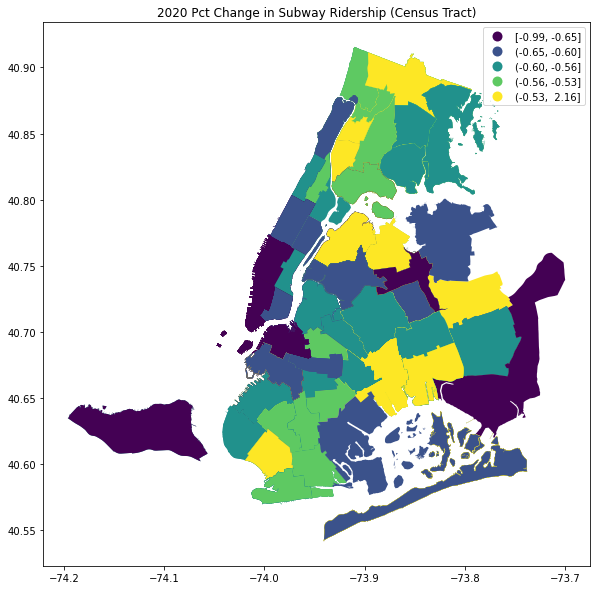

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
#PUMA.plot(ax=ax, alpha=0.8,color='grey')
StationByPUMA.plot(column='pct_change', ax=ax, legend=True, scheme='quantiles', k=5)
plt.title('2020 Pct Change in Subway Ridership (Census Tract)')
plt.show()

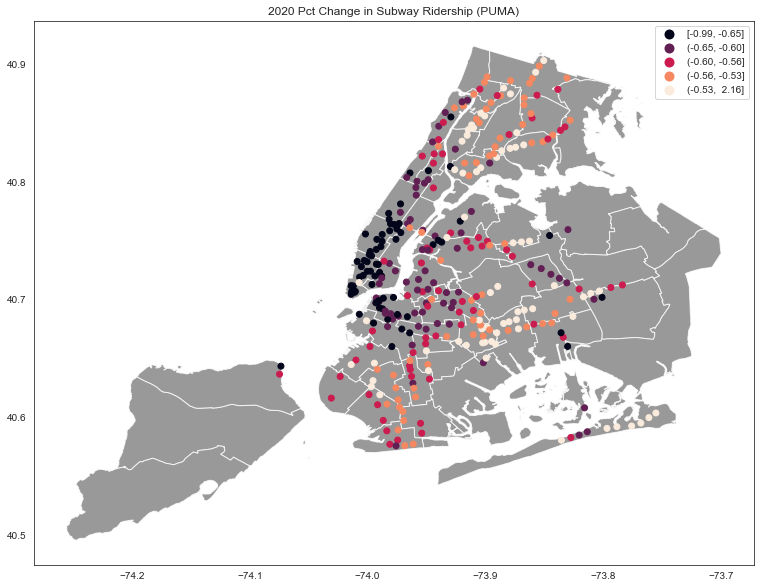

In [256]:
fig, ax = plt.subplots(figsize=(20,10))
PUMA.plot(ax=ax, alpha=0.8,color='grey')
StationData.plot(column='pct_change', ax=ax, legend=True, scheme='quantiles', k=5)
plt.title('2020 Pct Change in Subway Ridership (PUMA)')
plt.savefig('nyc_ridership_change.png')

## Introduce CitiBike Ridership

In [13]:
citibike = pd.read_csv('body.csv')
citibike

,date,station_id,startcount,endcount,station_name,station_longitude,station_latitude
0,2020-01-01,72,39.0,32.0,W 52 St & 11 Ave,-73.993929,40.767272
1,2020-01-01,79,15.0,15.0,Franklin St & W Broadway,-74.006667,40.719116
2,2020-01-01,82,16.0,17.0,St James Pl & Pearl St,-74.000165,40.711174
3,2020-01-01,83,16.0,18.0,Atlantic Ave & Fort Greene Pl,-73.976323,40.683826
4,2020-01-01,116,70.0,52.0,W 17 St & 8 Ave,-74.001497,40.741776
...,...,...,...,...,...,...,...
288299,2020-10-31,4149,NaN,3.0,E 167 St & Franklin Ave,-73.905210,40.828950
288300,2020-10-31,4158,NaN,1.0,Freeman St & Reverend James A Polite Ave,-73.894717,40.830529
288301,2020-10-31,4175,NaN,1.0,E 171 St & Webster Ave,-73.905838,40.838379
288302,2020-10-31,4206,NaN,1.0,Southern Blvd & E 149 St,-73.904192,40.811892


In [14]:
bike_by_station = citibike.groupby('station_name').agg({'station_longitude' : 'mean',\
                                              'station_latitude' : 'mean',\
                                              'startcount' : 'sum',\
                                              'endcount' : 'sum'})

In [15]:
BikeStation = gpd.GeoDataFrame(
    bike_by_station, geometry=gpd.points_from_xy(bike_by_station.station_longitude, bike_by_station.station_latitude))
BikeStation

,station_longitude,station_latitude,startcount,endcount,geometry
station_name,,,,,
1 Ave & E 110 St,-73.938300,40.792327,13877.0,14185.0,POINT (-73.93830 40.79233)
1 Ave & E 16 St,-73.981656,40.732219,45487.0,44585.0,POINT (-73.98166 40.73222)
1 Ave & E 16 St [temporarily removed],-73.981656,40.732219,4434.0,4353.0,POINT (-73.98166 40.73222)
1 Ave & E 18 St,-73.980544,40.733812,39647.0,38459.0,POINT (-73.98054 40.73381)
1 Ave & E 18 St [temporarily removed],-73.980544,40.733812,4388.0,4266.0,POINT (-73.98054 40.73381)
...,...,...,...,...,...
Wyckoff St & Bond St,-73.987213,40.684617,324.0,342.0,POINT (-73.98721 40.68462)
Wyckoff St & Nevins St,-73.984275,40.683426,7040.0,7116.0,POINT (-73.98427 40.68343)
Wythe Ave & Metropolitan Ave,-73.963198,40.716887,29912.0,30358.0,POINT (-73.96320 40.71689)


In [16]:
puma_bike = gpd.sjoin(PUMA, BikeStation, how='left', op='contains')
puma_bike['PUMA'] = pd.to_numeric(puma_bike['PUMA'])

In [17]:
puma_demo = pd.read_csv('NYC_demo_puma.csv').iloc[:,1:]
puma_demo['PUMA'] = pd.to_numeric(puma_demo['PUMA'])

In [18]:
NYC_riders = StationByPUMA.merge(puma_bike, on='PUMA')
NYC_riders = NYC_riders.merge(puma_demo, on='PUMA')

## Clustering with Demo variables only

In [19]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

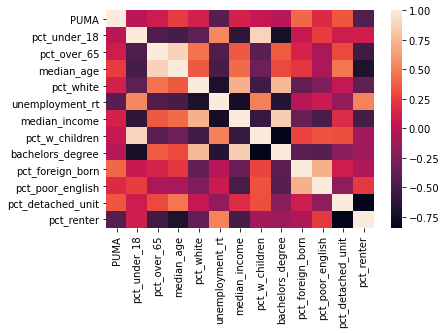

In [20]:
sns.heatmap(puma_demo.corr())

In [21]:
scaler = StandardScaler()
puma_demoS = scaler.fit_transform(puma_demo.iloc[:,2:])
puma_demoS = pd.DataFrame(index=puma_demo['PUMA'], columns=puma_demo.iloc[:,2:].columns, data=puma_demoS)

In [22]:
pca = PCA(2)
puma_demo2=pca.fit_transform(puma_demoS)
eigenvalues = pca.explained_variance_ratio_

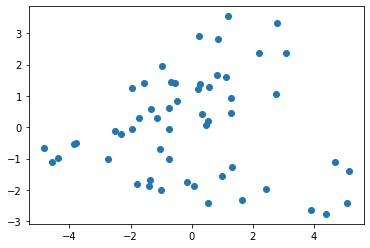

In [23]:
puma_demo2 = pd.DataFrame(puma_demo2)
plt.scatter(puma_demo2[0], puma_demo2[1])

In [24]:
SSE = []
for i in range(2,7):
    km = KMeans(n_clusters = i)
    res=km.fit(puma_demoS)
    SSE.append(res.inertia_)
print(SSE)

[471.7767569084765, 359.8368966139437, 297.10977472107305, 256.925975310178, 227.9216610196332]


In [25]:
km = KMeans(3)
res=km.fit(puma_demoS)
puma_demoS['cluster'] = res.labels_
res.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [26]:
puma_demo['cluster'] = res.labels_

In [27]:
puma_demo2['cluster'] = res.labels_

In [28]:
puma_demo2.groupby('cluster').mean()

,0,1
cluster,,
0,0.827282,1.586773
1,-1.978644,-0.562859
2,3.011454,-1.981361


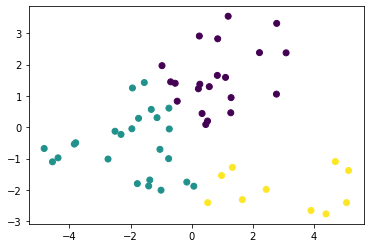

In [29]:
fig, ax = plt.subplots()

plt.scatter(puma_demo2[0], puma_demo2[1], c = puma_demo2['cluster'], cmap='viridis')

In [30]:
puma_demo['cluster'] = res.labels_

In [32]:
puma_demo.drop(columns=['pct_under_18','pct_poor_english','pct_detached_unit']).groupby('cluster').mean()

,PUMA,pct_over_65,median_age,pct_white,unemployment_rt,median_income,pct_w_children,bachelors_degree,pct_foreign_born,pct_renter
cluster,,,,,,,,,,
0,4013.047619,16.514286,40.142857,36.347619,6.271429,67152.761905,31.77619,33.761905,42.161905,50.047619
1,3885.916667,11.562500,33.604167,16.816667,8.920833,43841.000000,34.40000,25.691667,36.558333,80.791667
2,3895.600000,14.740000,36.980000,59.940000,4.920000,99520.500000,18.03000,66.950000,25.620000,72.160000


In [44]:
PUMA.merge(NYC_riders, on='PUMA').drop(columns=['geometry_x','geometry_y']).plot(ax=ax,alpha=1,column='cluster', cmap='viridis', scheme='quantiles', legend=True)

KeyError: 'cluster'

AttributeError: 'Line2D' object has no property 'column'

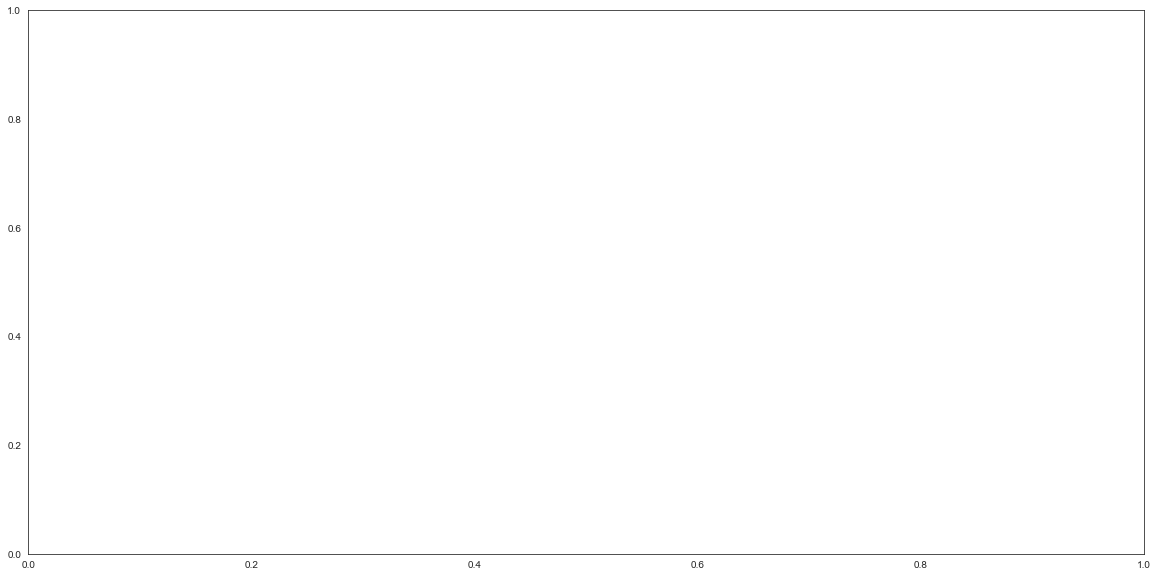

In [40]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20,10))
NYC_riders.merge(PUMA, on='PUMA').plot(ax=ax,alpha=1,column='cluster', cmap='viridis', scheme='quantiles', legend=True)
ax.legend([0,1,2])
plt.title('New York City PUMAs by Demographic Profile', fontsize=15)
plt.savefig('NYC_demo_map.png')

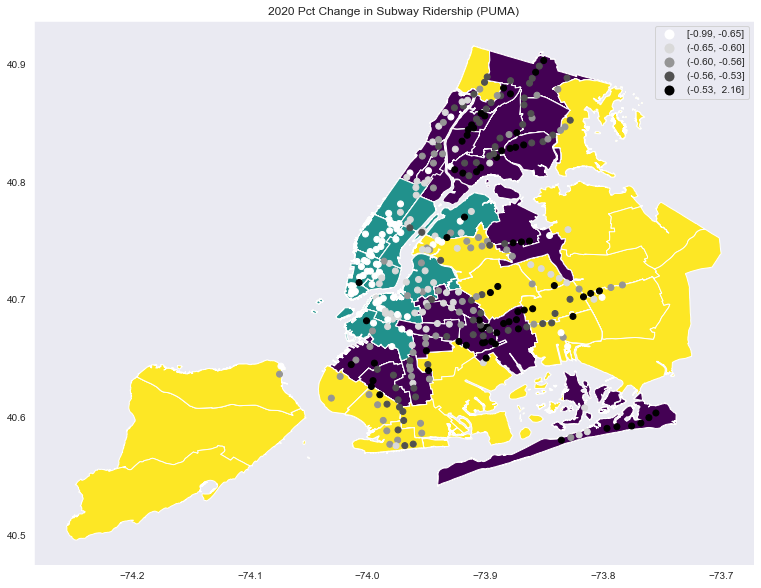

In [282]:
sns.set_style('dark')

fig, ax = plt.subplots(figsize=(20,10))
NYC_riders.plot(ax=ax, alpha=1,column='cluster', cmap='viridis')
StationByCT.plot(column='pct_change', ax=ax, legend=True, scheme='quantiles', k=5, cmap='Greys')
plt.title('2020 Pct Change in Subway Ridership (PUMA)')
plt.savefig('subway_ridership_over_demo.png')

## Clustering with Ridership

In [45]:
NYC_riders

,PUMA,Shape_Leng_x,Shape_Area_x,geometry_x,index_right_x,2019,2020,pct_change,Shape_Leng_y,Shape_Area_y,...,median_age,pct_white,unemployment_rt,median_income,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter
0,3701,53227.144456,9.792852e+07,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",Kingsbridge Rd,5255554.0,2439664.0,-0.535793,53227.144456,9.792852e+07,...,38.7,32.3,7.9,59995,29.9,40.3,34.2,20.6,5.6,67.8
1,3701,53227.144456,9.792852e+07,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",Bedford Park Blvd - Lehman College,1565603.0,673194.0,-0.570010,53227.144456,9.792852e+07,...,38.7,32.3,7.9,59995,29.9,40.3,34.2,20.6,5.6,67.8
2,3701,53227.144456,9.792852e+07,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",231 St,2944480.0,1222758.0,-0.584729,53227.144456,9.792852e+07,...,38.7,32.3,7.9,59995,29.9,40.3,34.2,20.6,5.6,67.8
3,3701,53227.144456,9.792852e+07,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",238 St,1227438.0,557176.0,-0.546066,53227.144456,9.792852e+07,...,38.7,32.3,7.9,59995,29.9,40.3,34.2,20.6,5.6,67.8
4,3701,53227.144456,9.792852e+07,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",Van Cortlandt Park - 242 St,2249005.0,980730.0,-0.563927,53227.144456,9.792852e+07,...,38.7,32.3,7.9,59995,29.9,40.3,34.2,20.6,5.6,67.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,3808,40263.471583,4.492053e+07,"MULTIPOLYGON (((-73.96421 40.74660, -73.96427 ...",3 Av,1715330.0,716842.0,-0.582097,40263.471583,4.492053e+07,...,36.9,69.7,3.4,117921,10.5,80.5,23.2,5.8,1.6,66.5
10973,3808,40263.471583,4.492053e+07,"MULTIPOLYGON (((-73.96421 40.74660, -73.96427 ...",3 Av,1715330.0,716842.0,-0.582097,40263.471583,4.492053e+07,...,36.9,69.7,3.4,117921,10.5,80.5,23.2,5.8,1.6,66.5
10974,3808,40263.471583,4.492053e+07,"MULTIPOLYGON (((-73.96421 40.74660, -73.96427 ...",3 Av,1715330.0,716842.0,-0.582097,40263.471583,4.492053e+07,...,36.9,69.7,3.4,117921,10.5,80.5,23.2,5.8,1.6,66.5
10975,3808,40263.471583,4.492053e+07,"MULTIPOLYGON (((-73.96421 40.74660, -73.96427 ...",3 Av,1715330.0,716842.0,-0.582097,40263.471583,4.492053e+07,...,36.9,69.7,3.4,117921,10.5,80.5,23.2,5.8,1.6,66.5


In [46]:
NYC_riders = NYC_riders.drop(columns=['Shape_Leng_x','Shape_Area_x','Shape_Leng_y','Shape_Area_y',\
                         'station_longitude','station_latitude',2019,2020,'geometry_x',\
                         'index_right_x','geometry_y','index_right_y','name',])


In [422]:
full_puma_1 = NYC_riders.drop(columns=['startcount','endcount']).groupby('PUMA').mean()
full_puma_2 = NYC_riders[['PUMA','startcount','endcount']].groupby('PUMA').sum()
full_puma_1.head()

,pct_change,pct_under_18,pct_over_65,median_age,pct_white,unemployment_rt,median_income,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,cluster
PUMA,,,,,,,,,,,,,,
3705,-0.547469,28.4,9.4,29.7,4.0,13.8,25595,42.3,13.2,31.4,27.5,2.4,93.1,2.0
3708,-0.554492,27.3,9.9,32.6,2.0,10.5,29938,39.1,15.6,42.9,34.4,1.3,93.2,2.0
3710,-0.538852,27.9,8.8,30.5,2.0,11.8,24849,41.5,10.7,30.2,33.7,1.7,92.6,2.0
3801,-0.617701,17.4,14.1,35.8,18.9,9.2,52051,27.0,33.3,46.4,37.9,1.0,90.6,2.0
3802,-0.638478,15.1,12.4,32.3,27.6,6.3,50867,23.4,45.4,34.6,20.8,1.1,84.5,1.0


In [362]:
full_puma = full_puma_1.merge(full_puma_2, on='PUMA')

In [432]:
scaler = StandardScaler()
full_pumaS = scaler.fit_transform(full_puma)
full_pumaS = pd.DataFrame(index=full_puma.index, columns=full_puma.columns, data=full_pumaS)

In [431]:
full_pumaS = full_pumaS.dropna()

In [370]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(full_pumaS.dropna())
    SSE.append(res.inertia_)
print(SSE)

[536.9313731431131, 428.65461431380766, 366.6857293089702, 328.7650638584205, 280.0910196821111, 248.46285483040552, 216.77493933116347, 189.83738267043893]


In [371]:
km = KMeans(3)
res=km.fit(puma_demoS)
full_puma['cluster'] = res.labels_

In [372]:
full_puma.groupby('cluster').mean()

,pct_change,pct_under_18,pct_over_65,median_age,pct_white,unemployment_rt,median_income,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,startcount,endcount
cluster,,,,,,,,,,,,,,,
0,-0.587832,19.152381,15.433333,38.180952,33.319048,6.776190,63154.904762,28.628571,37.985714,41.42381,25.709524,10.72381,65.980952,1.748921e+06,1.732479e+06
1,-0.571469,22.400000,12.908333,35.641667,27.887500,8.020833,61298.958333,32.087500,34.475000,32.80000,20.116667,9.36250,69.695833,3.183831e+06,3.192459e+06
2,-0.585035,21.450000,13.780000,36.210000,39.730000,6.020000,66016.900000,30.190000,37.000000,36.19000,23.050000,8.89000,65.330000,5.573876e+06,5.682440e+06


In [398]:
scaler = StandardScaler()
NYC_ridersS = scaler.fit_transform(NYC_riders.iloc[:,1:])
NYC_ridersS = pd.DataFrame(index=NYC_riders['PUMA'],columns=NYC_riders.iloc[:,1:].columns, data=NYC_ridersS)

In [434]:
pca = PCA()
NYC_ridersP=pca.fit_transform(NYC_ridersS)
NYC_ridersP = pd.DataFrame(index=NYC_riders.index, columns=NYC_ridersS.columns, data=NYC_ridersP)

In [437]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(NYC_ridersP)
    SSE.append(res.inertia_)
print(SSE)

[89972.97361322724, 69031.36642544574, 55361.226047220254, 46418.454965594545, 41377.938156779324, 35512.8463850428, 30950.00208336743, 26454.422835233046]


In [438]:
km = KMeans(3)
res=km.fit(NYC_ridersP)
NYC_riders['cluster'] = res.labels_
NYC_ridersS['cluster'] = res.labels_

In [450]:
NYC_riders.groupby('cluster').mean().rename\
(columns={'startcount':'citibike_trips', 'pct_change':'metro_change', 'unemployment_rt':'unemployed'})\
.drop(columns=['PUMA','endcount','pct_under_18','pct_poor_english','pct_detached_unit','pct_renter'])

,metro_change,citibike_trips,pct_over_65,median_age,pct_white,unemployed,median_income,pct_w_children,bachelors_degree,pct_foreign_born
cluster,,,,,,,,,,
0,-0.579417,10357.303982,11.423686,34.683367,45.018020,6.294630,76876.455063,23.926553,52.401911,26.890034
1,-0.687863,29972.967405,14.758391,37.539903,65.928928,4.221212,120282.826076,14.026662,77.007130,25.925898
2,-0.563905,2243.592857,9.768968,31.387897,9.912143,10.382143,36134.190873,34.917103,20.299881,33.145675


In [457]:
NYC_riders['PUMA'] = pd.to_numeric(NYC_riders['PUMA'])
PUMA['PUMA'] = pd.to_numeric(PUMA['PUMA'])

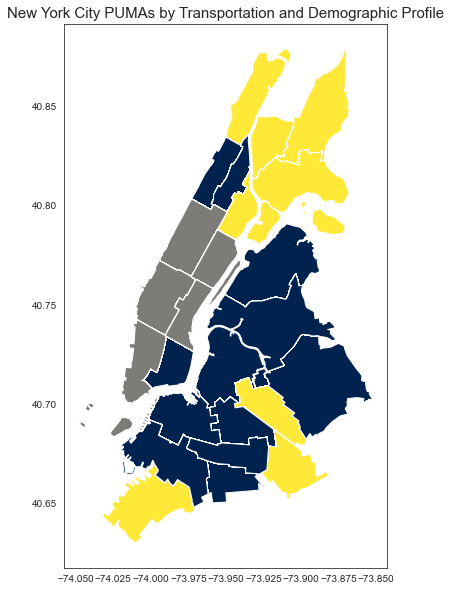

In [469]:
sns.set_style('white')
puma_final = PUMA.merge(NYC_riders, on='PUMA')
puma_final.plot(column='cluster',figsize=(20,10), cmap='cividis')
plt.title('New York City PUMAs by Transportation and Demographic Profile', fontsize=15)
plt.savefig('ridership_clusters.png')